In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [ ]:
def read_data(filename):
    times, positions, velocities = [], [], []
    with open(filename, 'r') as file:
        for line in file:
          line = line.strip()
          if line:
              time_str = line[:line.find(" ")]
              time = float(time_str)

              pos_start = line.find("(") + 1
              pos_end = line.find(")", pos_start)
              position_str = line[pos_start:pos_end]
              position = tuple(map(float, position_str.split(',')))

              vel_start = line.find("(", pos_end) + 1
              vel_end = line.find(")", vel_start)
              velocity_str = line[vel_start:vel_end]
              velocity = tuple(map(float, velocity_str.split(',')))

              times.append(time)
              positions.append(position)
              velocities.append(velocity)

    times = np.array(times)
    positions = np.array(positions)
    velocities = np.array(velocities)
    return times, positions, velocities

def kinetic_energy(velocities, mass):
    speeds_squared = np.sum(velocities**2, axis=1)
    return 0.5 * mass * speeds_squared

In [75]:
def writer_trajectory(filename):
  mass = 1.0

  times, positions, velocities = read_data(filename)

  kinetic_energies = kinetic_energy(velocities, mass)

  fig = plt.figure(figsize=(12, 10))

  ax1 = fig.add_subplot(221, projection='3d')
  ax1.plot(positions[:, 0], positions[:, 1], positions[:, 2], label="Trajectory")
  ax1.set_xlabel('X')
  ax1.set_ylabel('Y')
  ax1.set_zlabel('Z')
  ax1.set_title("3D Trajectory")
  ax1.legend()
  

  ax2 = fig.add_subplot(222)
  ax2.plot(positions[:, 0], positions[:, 1], color = 'g')
  ax2.set_xlabel('X')
  ax2.set_ylabel('Y')
  ax2.set_title("XY Plane")


  ax3 = fig.add_subplot(223)
  ax3.plot(positions[:, 0], positions[:, 2], color = 'r')
  ax3.set_xlabel('X')
  ax3.set_ylabel('Z')
  ax3.set_title("XZ Plane")
  ax3.set_aspect('equal')


  ax4 = fig.add_subplot(224)
  ax4.plot(positions[:, 1], positions[:, 2], color = 'b')
  ax4.set_xlabel('Y')
  ax4.set_ylabel('Z')
  ax4.set_title("YZ Plane")



  plt.figure()
  plt.plot(times, kinetic_energies, label="Kinetic Energy")
  plt.xlabel("Time")
  plt.ylabel("Kinetic Energy")
  plt.title("Kinetic Energy Over Time")
  # plt.ylim(0.0075, 0.0125) 
  plt.legend()
  # изменить масштаб по y

  plt.show()


In [57]:
def writer_spectrum(filename):
    frequencies = []
    spectrum_values = []

    with open(filename, 'r') as file:
        for line in file:
            parts = line.split()
            frequency = float(parts[0])
            spectrum_value = float(parts[1])
            
            frequencies.append(frequency)
            spectrum_values.append(spectrum_value)

    frequencies = np.array(frequencies)
    spectrum_values = np.array(spectrum_values)
    
    plt.figure(figsize=(10, 6))
    plt.plot(frequencies, spectrum_values, linestyle='-', color='b')

    plt.title("Зависимость спектра от частоты")
    plt.grid(True)

    plt.show()  

In [79]:
def writer_color_map(filename, w_max):
    color_map = np.loadtxt(filename)

    num_w = color_map.shape[1]
    num_theta = color_map.shape[0]
    w = np.linspace(0.1, w_max, num_w)  # Диапазон радиуса от 0.1 до max_w
    theta = np.linspace(0, 2 * np.pi, num_theta) 

    W, Theta = np.meshgrid(w, theta)

    color_map_log = np.log10(color_map)

    fig, ax = plt.subplots(subplot_kw={'projection': 'polar'}, figsize=(8, 6))
    contour = ax.contourf(Theta, W, color_map_log, levels=40, cmap="viridis") 

    cbar = fig.colorbar(contour, ax=ax, label="Logarithmic Intensity")
    cbar.set_label("Intensity (log scale)")

    plt.show()

In [5]:
import particle_motion

solver_name = "PusherBorisRR"
field_name = "GaussEMField"
position = [0.0, 0.0, 0.0]
velocity = [0.1, 0.1, 0.0]
mass = 1.0
charge = - 1.0
electric_field = [0.0, 0.0, 0.0]
magnetic_field = [0.0, 1.0, 0.0]
time_start = 0.0
time_end = 200.0
dt = 0.01

result = particle_motion.trajectory_array(
    solver_name, field_name, position, velocity,
    mass, charge, electric_field, magnetic_field, time_start, time_end, dt
)

print("Результат:", result[4])


Результат: 0.09999500012488123


#Осциллирующее поле

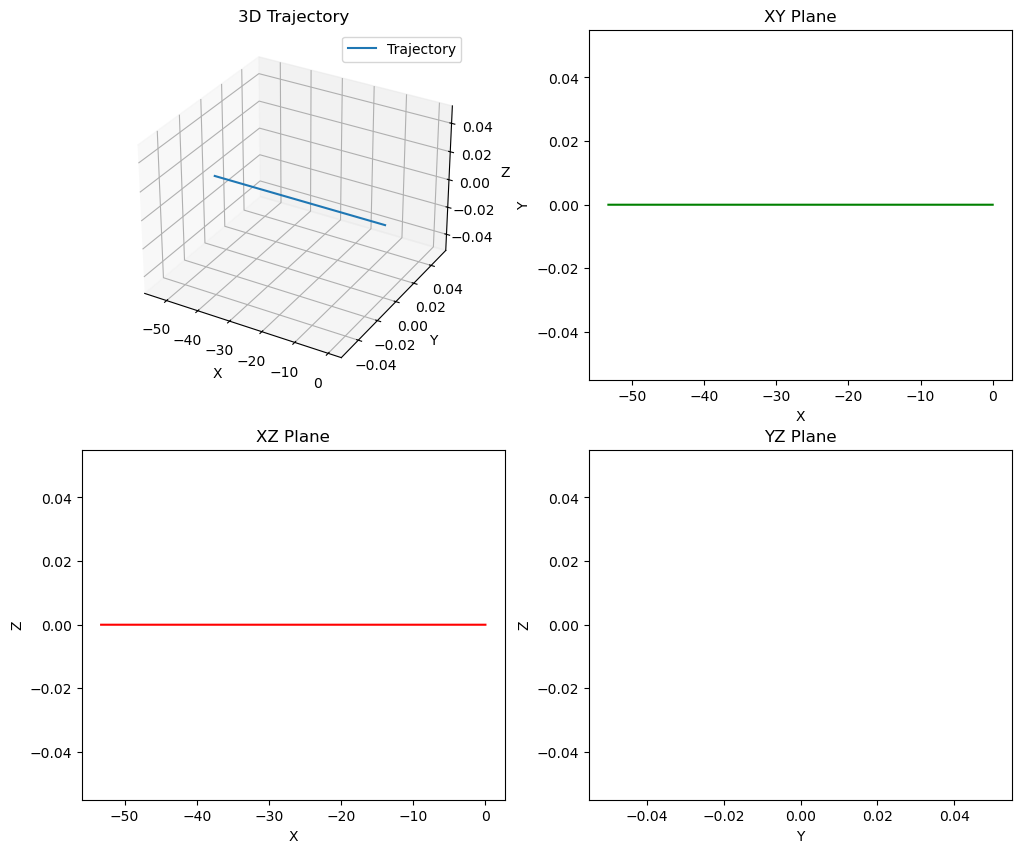

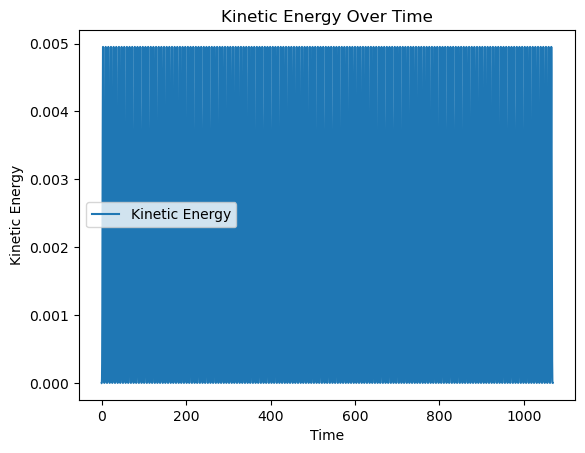

In [59]:
filename = "C:\\Users\\Антон\\Desktop\\МИФИ\\4 курс\\My_project\\build\\data_particles_oscillatingEMField.txt"
writer_trajectory(filename)

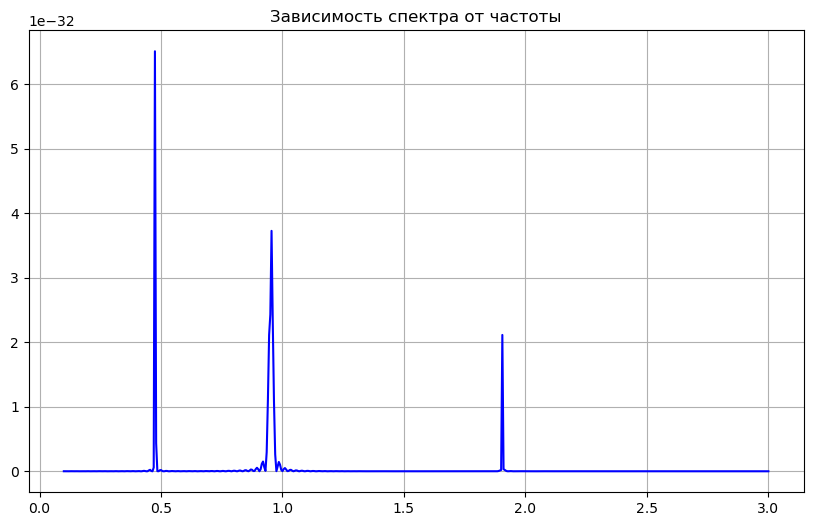

In [60]:
filename = 'C:\\Users\\Антон\\Desktop\\МИФИ\\4 курс\\My_project\\build\\radiation_spectrum_oscillatingEMField.txt'
writer_spectrum(filename)


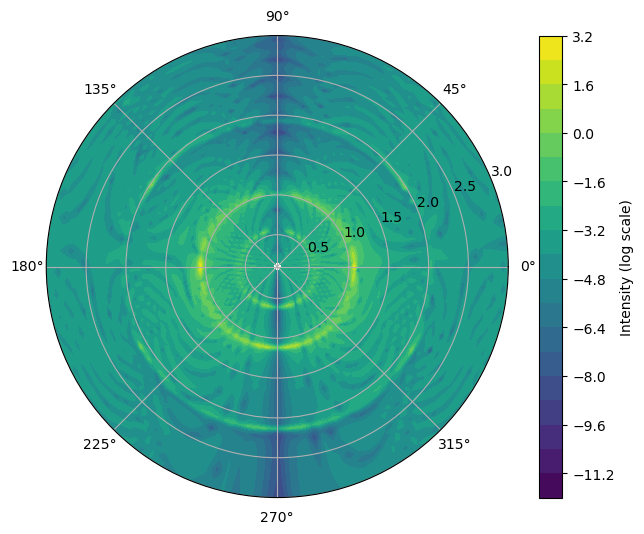

In [61]:
filename = 'C:\\Users\\Антон\\Desktop\\МИФИ\\4 курс\\My_project\\build\\color_map_oscillatingEMField.txt'
writer_color_map(filename, 3.0)

#Перекрестное поле

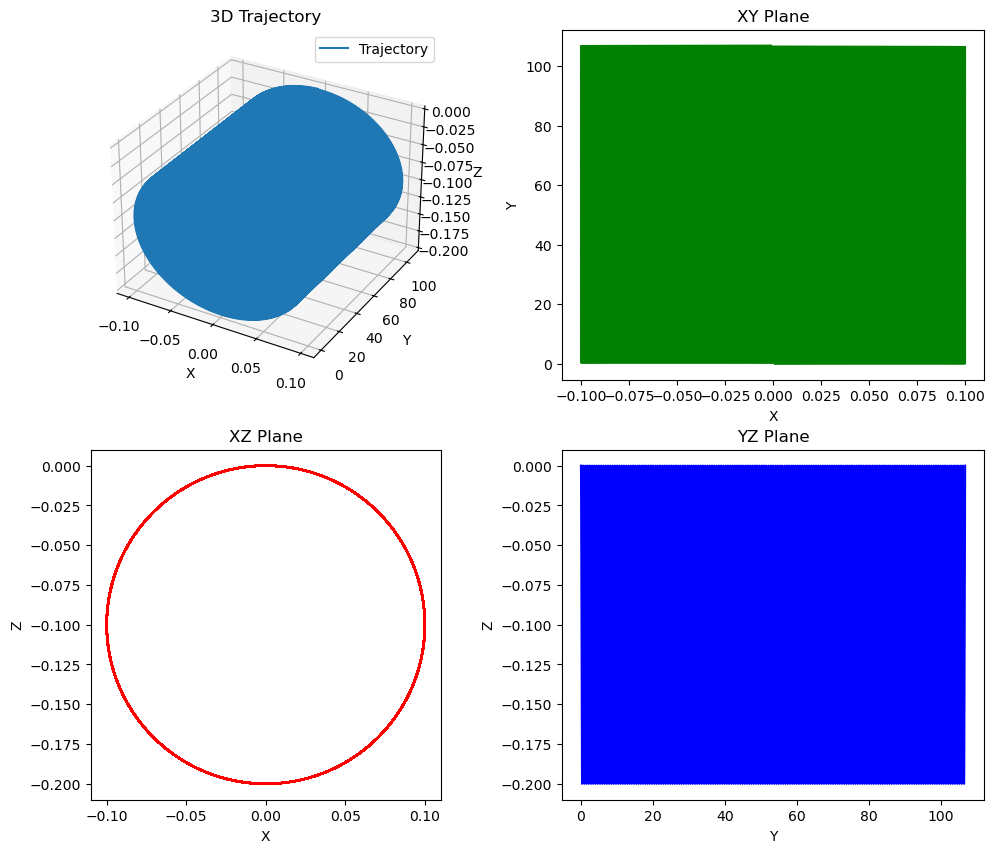

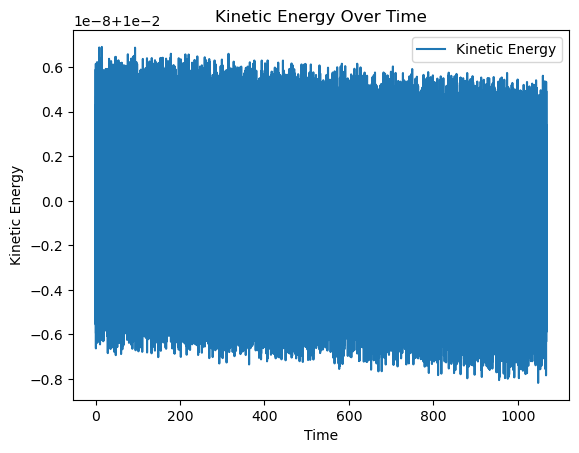

In [76]:
filename = "C:\\Users\\Антон\\Desktop\\МИФИ\\4 курс\\My_project\\build\\data_particles_crossEMField.txt"
writer_trajectory(filename)

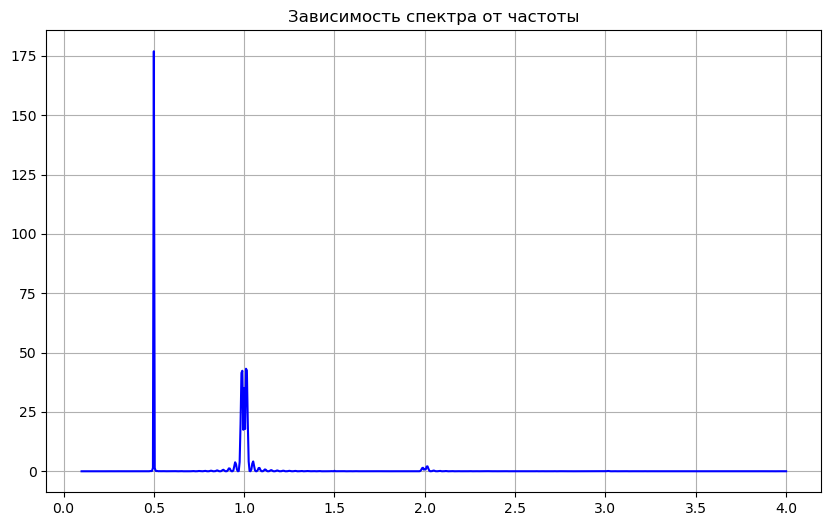

In [66]:
filename = 'C:\\Users\\Антон\\Desktop\\МИФИ\\4 курс\\My_project\\build\\radiation_spectrum_crossEMField.txt'
writer_spectrum(filename)


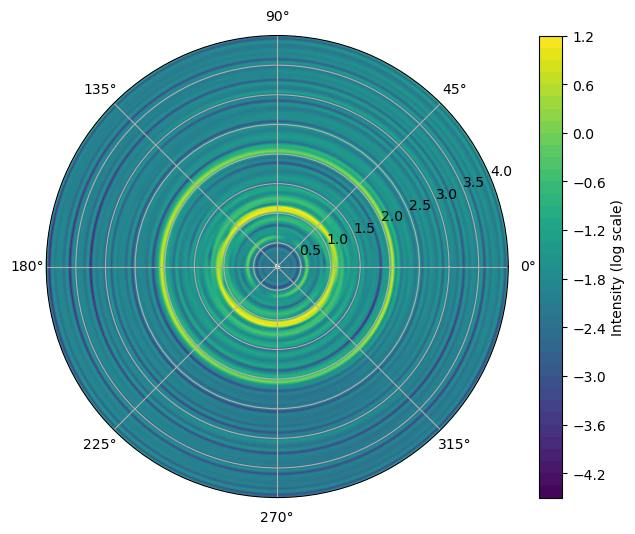

In [80]:
filename = 'C:\\Users\\Антон\\Desktop\\МИФИ\\4 курс\\My_project\\build\\color_map_crossEMField.txt'
writer_color_map(filename, 4)

# ТФТТ

C:\Users\Антон\AppData\Local\Temp\ipykernel_19892\2495984174.py:19: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  result, _ = quad(integrand, 0, np.inf * 2, args=(omega, gamma_1, gamma_2, m))
C:\Users\Антон\AppData\Local\Temp\ipykernel_19892\2495984174.py:19: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  result, _ = quad(integrand, 0, np.inf * 2, args=(omega, gamma_1, gamma_2, m))


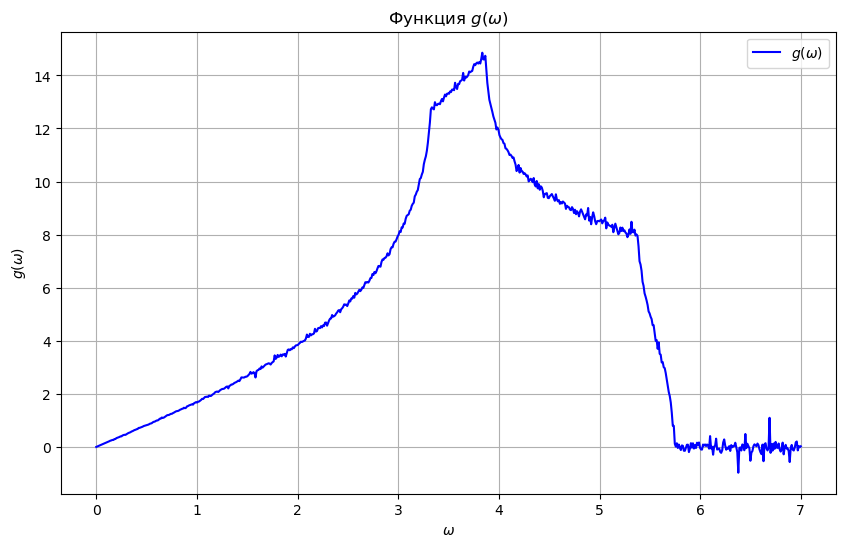

In [56]:
import numpy as np
from scipy.integrate import quad
from scipy.special import jv
import matplotlib.pyplot as plt


gamma_1 = 4.5
gamma_2 = 1.0  
m = 1.0       

def integrand(t, omega, gamma_1, gamma_2, m):
    term = omega**2 - (2 * gamma_1 + 4 *gamma_2) / m
    bessel_arg_1 = (2 * gamma_1 * t) / m
    bessel_arg_2 = (2 * gamma_2 * t) / m
    return np.cos(term * t) * (jv(0, bessel_arg_1)**2) *  jv(0, bessel_arg_2) 


def g(omega, gamma_1, gamma_2, m):
    result, _ = quad(integrand, 0, np.inf * 2, args=(omega, gamma_1, gamma_2, m))
    return 8 * np.pi * omega * result

omega_values = np.linspace(0.0, 7, 700)
g_values = [g(omega, gamma_1, gamma_2, m) for omega in omega_values]

plt.figure(figsize=(10, 6))
plt.plot(omega_values, g_values, label=r'$g(\omega)$', color='blue')
plt.title(r'Функция $g(\omega)$')
plt.xlabel(r'$\omega$')
plt.ylabel(r'$g(\omega)$')
plt.grid(True)
plt.legend()
plt.show()

C:\Users\Антон\AppData\Local\Temp\ipykernel_19892\2706556426.py:19: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  result, _ = quad(integrand, 0, np.inf, args=(omega, gamma_1, gamma_2, m))
C:\Users\Антон\AppData\Local\Temp\ipykernel_19892\2706556426.py:19: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  result, _ = quad(integrand, 0, np.inf, args=(omega, gamma_1, gamma_2, m))


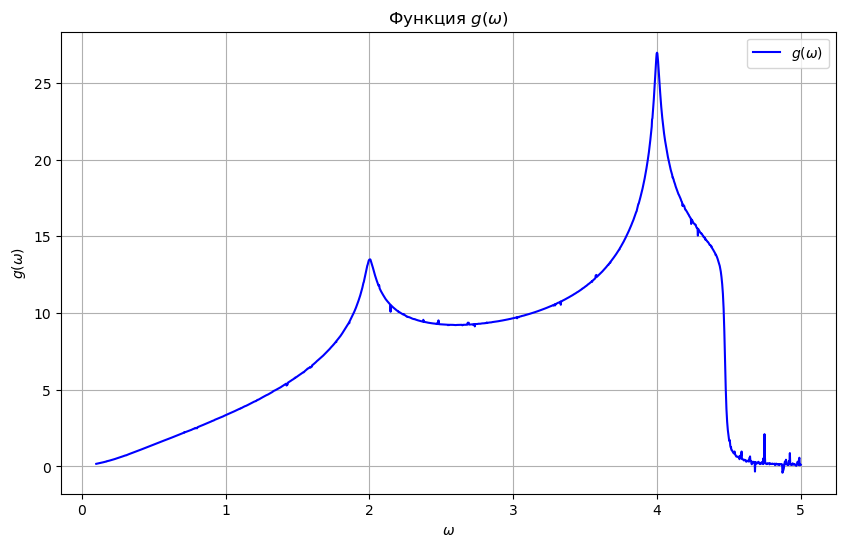

In [ ]:
import numpy as np
from scipy.integrate import quad
from scipy.special import jv
import matplotlib.pyplot as plt


gamma_1 = 4.0  
gamma_2 = 1.0  
m = 1.0        

def integrand(t, omega, gamma_1, gamma_2, m):
    term = omega**2 - (2 * gamma_1 + 2 *gamma_2) / m
    bessel_arg_1 = (2 * gamma_1 * t) / m
    bessel_arg_2 = (2 * gamma_2 * t) / m
    return np.cos(term * t) * (jv(0, bessel_arg_1)) *  jv(0, bessel_arg_2) * np.e**(- 0.1 * t )


def g(omega, gamma_1, gamma_2, m):
    result, _ = quad(integrand, 0, np.inf, args=(omega, gamma_1, gamma_2, m))
    return 8 * np.pi * omega * result

omega_values = np.linspace(0.0, 5, 2000) 
g_values = [g(omega, gamma_1, gamma_2, m) for omega in omega_values]

plt.figure(figsize=(10, 6))
plt.plot(omega_values, g_values, label=r'$g(\omega)$', color='blue')
plt.title(r'Функция $g(\omega)$')
plt.xlabel(r'$\omega$')
plt.ylabel(r'$g(\omega)$')
plt.grid(True)
plt.legend()
plt.show()

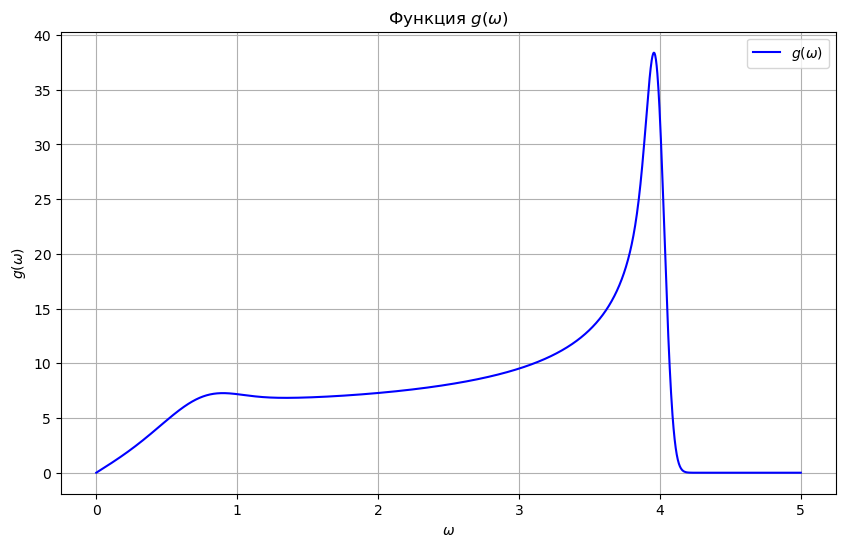

In [31]:
import numpy as np
from scipy.integrate import quad
from scipy.special import jv
import matplotlib.pyplot as plt


gamma_1 = 4.0  
m = 1.0        

def integrand(t, omega, gamma_1, gamma_2, m):
    term = omega**2 - (2 * gamma_1) / m
    bessel_arg_1 = (2 * gamma_1 * t) / m
    return np.cos(term * t) * (jv(0, bessel_arg_1)) * np.e**(- 0.1 * t * t)


def g(omega, gamma_1, gamma_2, m):
    result, _ = quad(integrand, 0, np.inf, args=(omega, gamma_1, gamma_2, m))
    return 8 * np.pi * omega * result

omega_values = np.linspace(0.0, 5, 2000) 
g_values = [g(omega, gamma_1, gamma_2, m) for omega in omega_values]

plt.figure(figsize=(10, 6))
plt.plot(omega_values, g_values, label=r'$g(\omega)$', color='blue')
plt.title(r'Функция $g(\omega)$')
plt.xlabel(r'$\omega$')
plt.ylabel(r'$g(\omega)$')
plt.grid(True)
plt.legend()
plt.show()

In [115]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import jv

def g_3(omega, gamma_1, gamma_2, m):
    def integrand(t):
        cos_term = np.cos((omega**2 - 2 * (gamma_1 + 2 * gamma_2)/ m) * t )
        j0_term = jv(0, 2 * gamma_2 * t / m)**2 * jv(0, 2 * gamma_1 * t / m)
        return cos_term * j0_term

    t_max = 10000  
    n_points = 100000
    t = np.linspace(0, t_max, n_points)

    integrand_values = integrand(t)
    integral_value = np.trapz(integrand_values, t)
    return 8 * np.pi * omega * integral_value

def g_2(omega, gamma_1, gamma_2, m):
    def integrand(t):
        cos_term = np.cos((omega**2 - 2 * (gamma_1 + gamma_2)/ m) * t )
        j0_term = jv(0, 2 * gamma_2 * t / m) * jv(0, 2 * gamma_1 * t / m)
        return cos_term * j0_term

    t_max = 10000  
    n_points = 100000
    t = np.linspace(0, t_max, n_points)

    integrand_values = integrand(t)
    integral_value = np.trapz(integrand_values, t)
    return 8 * np.pi * omega * integral_value

def g_1(omega, gamma_1, m):
    def integrand(t):
        cos_term = np.cos((omega**2 - 2 * gamma_1 / m) * t)
        j0_term = jv(0, 2 * gamma_1 * t / m)
        return cos_term * j0_term

    t_max = 100000  
    n_points = 1000000
    t = np.linspace(0, t_max, n_points)

    integrand_values = integrand(t)
    integral_value = np.trapz(integrand_values, t)
    return 8 * np.pi * omega * integral_value




In [126]:
def g_3_D(omega, gamma_1, gamma_2):
    m = 1
    a = 1.5

    f_D = (6 * np.pi * m / a)**(1/3)


    def c(psi, theta):
        return (a / np.sqrt(m)) * ((gamma_1 - gamma_2) * np.sin(theta)**2 * np.cos(psi)**2 + gamma_2)**0.5

    def avg_c():
        integral = 0
        num_points = 100 
        psi_vals = np.linspace(0, 2 * np.pi, num_points)
        theta_vals = np.linspace(0, np.pi, num_points)
        for psi in psi_vals:
            for theta in theta_vals:
                integral += np.sin(theta) / (c(psi, theta))**3
        return ((1 / (4 * np.pi)) * integral * (2 * np.pi / num_points) * (np.pi / num_points))**(-1/3)

    c_bar = avg_c()
    omega_D = c_bar * f_D

    if omega < omega_D:
        return 3 * omega**2 / omega_D**3
    else:
        return 0

In [127]:
def writer(dimention):

    omega_values = np.linspace(0.0, 5, 500)

    if (dimention == 1):
        g_values = [g_1(omega, gamma_1, m) for omega in omega_values]
        g_values_D = [g_3_D(omega, gamma_1, gamma_2) for omega in omega_values]

    elif (dimention == 2):
        g_values = [g_2(omega, gamma_1, gamma_2, m) for omega in omega_values]
        g_values_D = [g_3_D(omega, gamma_1, gamma_2) for omega in omega_values]

    elif (dimention == 3):
        g_values = [g_3(omega, gamma_1, gamma_2, m) for omega in omega_values]
        g_values_D = [g_3_D(omega, gamma_1, gamma_2) for omega in omega_values]

    
    norm_integral = np.trapz(g_values, omega_values) 
    g_values /= norm_integral

    norm_integral_D = np.trapz(g_values_D, omega_values) 
    g_values_D /= norm_integral_D


    plt.figure(figsize=(10, 6))
    plt.plot(omega_values, g_values, label=r'$g(\omega)$', color='blue')
    plt.plot(omega_values, g_values_D, label=r'$g_D(\omega)$')

    plt.xlabel(r'$\omega$', fontsize=14)
    plt.ylabel(r'$g(\omega)$', fontsize=14)
    plt.title(f'График функции $g_{dimention}(\omega)$', fontsize=16)
    plt.legend(fontsize=12)
    plt.grid(True)
    plt.show()


<>:31: SyntaxWarning: invalid escape sequence '\o'
<>:31: SyntaxWarning: invalid escape sequence '\o'
C:\Users\Антон\AppData\Local\Temp\ipykernel_19892\2727634494.py:31: SyntaxWarning: invalid escape sequence '\o'
  plt.title(f'График функции $g_{dimention}(\omega)$', fontsize=16)


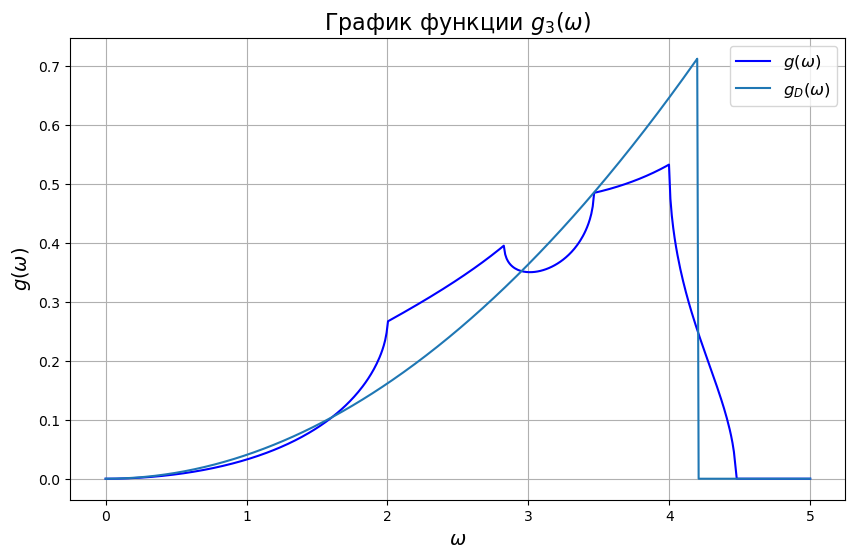

In [128]:
gamma_1 = 3
gamma_2 = 1
m = 1

writer(3)

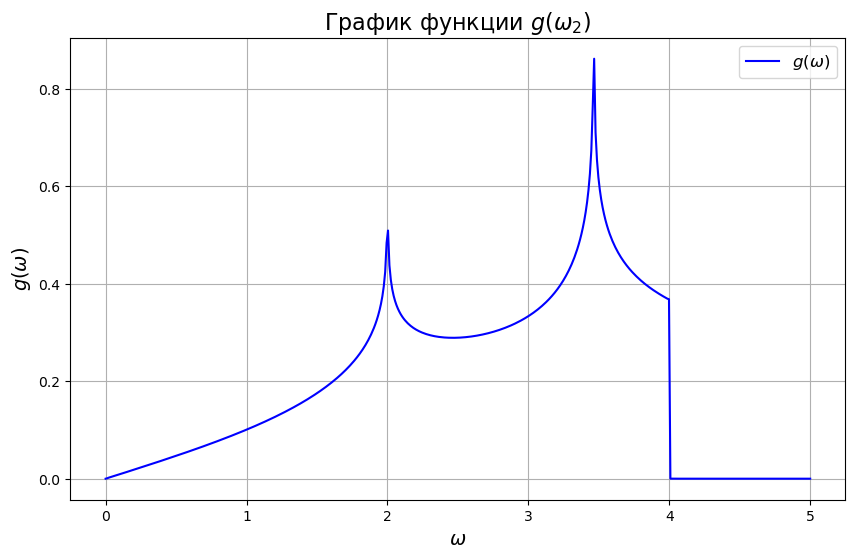

In [104]:
writer(2)

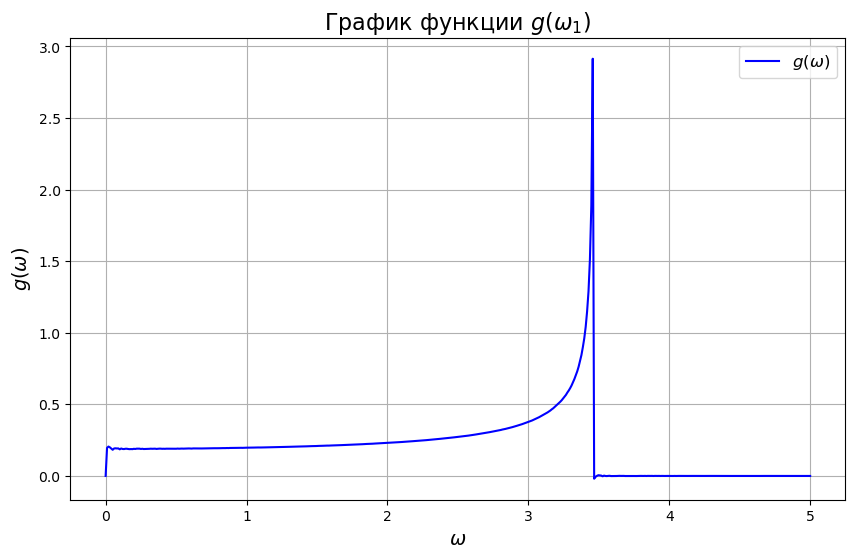

In [105]:
writer(1)

<>:45: SyntaxWarning: invalid escape sequence '\o'
<>:45: SyntaxWarning: invalid escape sequence '\o'
C:\Users\Антон\AppData\Local\Temp\ipykernel_19892\782934878.py:45: SyntaxWarning: invalid escape sequence '\o'
  plt.plot(omega_values, g_values, label=f"g_{dimention}(\omega)")


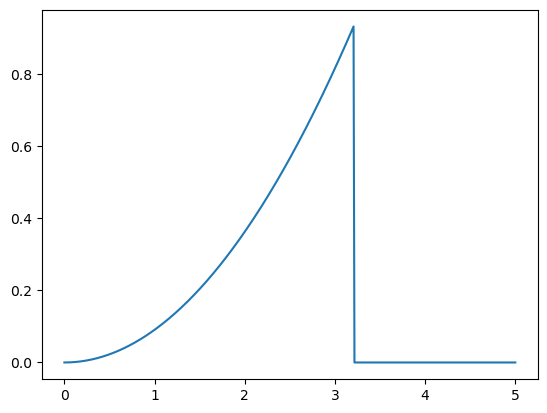

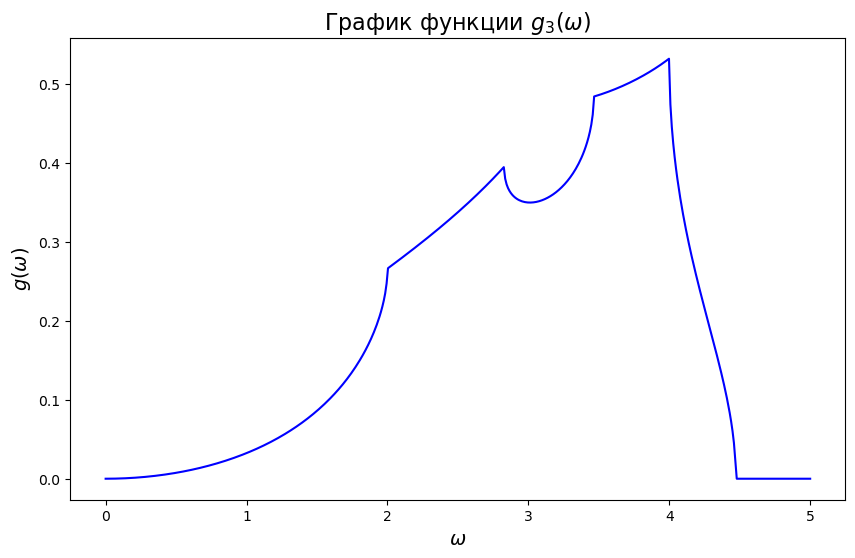

In [114]:
writer_D(3)
writer(3)

In [1]:
pip install cython

   ---------------------------------------- 0.0/2.8 MB ? eta -:--:--
   --- ------------------------------------ 0.3/2.8 MB ? eta -:--:--
   ------------------ --------------------- 1.3/2.8 MB 4.8 MB/s eta 0:00:01
   --------------------------------- ------ 2.4/2.8 MB 5.6 MB/s eta 0:00:01
   ---------------------------------------- 2.8/2.8 MB 5.2 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.
